# The Truth Particles Collection

The Truth particle collections. This is a little tricky because what is available in an event depends on the sliming algorithms that are applied to the data. The code to access the data is always the same - but the fact that the data is there or not will depend on the file's processing history.

In [1]:
from func_adl_servicex_xaodr21 import SXDSAtlasxAODR21
import matplotlib.pyplot as plt
from config import rucio_zee_r21_mc, xAODLocalTyped, local_xaod_path
import awkward as ak
import numpy as np
import pandas as pd
from particle import Particle, ParticleNotFound
from hist import Hist

pd.options.display.max_rows = None

In [2]:
#ds = SXDSAtlasxAODR21(rucio_zee_r21_mc, backend='dev_xaod')
ds = xAODLocalTyped(local_xaod_path)

Found backend type matching "xaod". Matching by type is depreciated. Please switch to using the "name" keyword in your servicex.yaml file.


Most derivations and the AOD's contain a connected combination of particles and vertices. We'll start with particles.

In [3]:
all_particles = (ds
                 .SelectMany(lambda e: e.TruthParticles("TruthParticles"))
                 .Where(lambda tp: (tp.pt() / 1000) > 1)
                 .Select(lambda tp: {
                         'pt': tp.pt() / 1000.0,
                         'pdgId': abs(tp.pdgId()),
                 })
                 .AsAwkwardArray()
                 .value())

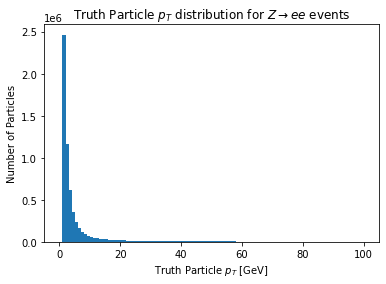

In [4]:
plt.hist(all_particles.pt, bins=100, range=(0, 100))
plt.xlabel('Truth Particle $p_T$ [GeV]')
plt.ylabel('Number of Particles')
_ = plt.title('Truth Particle $p_T$ distribution for $Z\\rightarrow ee$ events')

A very quick look at the pdgid's that we have in the data we are looking at. Note that we already applied `abs` to the `pdgID` to make this list more understandable. We'll use the amazing [particle](https://pypi.org/project/particle/) pypi package to get particle names. One thing is there are a few particles that aren't in the database, so we need to wrap things before we display them.

In [5]:
def get_pdg_name(pdgid: int) -> str:
    'Protected particle name from pdgid'
    if pdgid == 35:
        return 'LLP'
    try:
        return Particle.from_pdgid(pdgid).name
    except:
        return f'Unknown: {pdgid}'

unique, counts = np.unique(all_particles.pdgId, return_counts=True)
df = pd.DataFrame({'PDGId' : unique, 'Count': counts, 'Name': [get_pdg_name(int(i)) for i in unique] })
df['PDGId'] = df['PDGId'].astype(int)
df[df.Count>100].sort_values('Name')

,PDGId,Count,Name
59,2101,3060,(ud)(0)
60,2103,1095,(ud)(1)
63,2203,1990,(uu)(1)
51,533,2343,B(s)*0
50,531,5119,B(s)0
49,523,10792,B*+
47,513,10700,B*0
48,521,15562,B+
46,511,18539,B0
129,10411,112,D(0)*(2300)+


## Truth Vertices

We can explore the decay chain a little bit in Truth. Lets look at what $b$-quarks decay into, and how far a way from their production they decay. The ATLAS data model has several ways to follow the decay chain. Because we want to understand decay distances, we will need to use the `TruthVertex` object.

The ATLAS truth data model is, in the world of infinite disk space, quite straight forward. Every `TruthParticle` has a production and a decay `TruthVertex` associated with it. As long as the particle isn't stable (like an electron). However, in order to keep disk space under control in many cases the children or parent vertices may be missing. This leads us to a number of caveats that have to be encoded in our query:

* In ATLAS particles don't have to have production or decay vertices. If this is the case, then the link to the production or decay vertex will be a null pointer (at least, in C++). And if you generate code that references it, you'll get a hard segfault in ServiceX. So, always check to see if the vertex you are interested in exists!
* $b$-quarks can radiate, and thus decay into another $b$ quark and a $\gamma$ or similar. We are not interested in those decays.
* The $b$-quark hadronizes almost immediately, of course. So we are really interested in what the thing the $b$-quark hadronizes into is.
* The hadronization isn't straight forward, due to color strings, etc.


In [6]:
real_children = (
          ds
          .SelectMany(lambda e: e.TruthParticles("TruthParticles"))
          .Where(lambda tp: (abs(tp.pdgId()) == 5))
          .Where(lambda tp: tp.hasDecayVtx())
          .Where(lambda tp: tp.decayVtx().outgoingParticleLinks().Where(lambda dtp: abs(dtp.pdgId()) == 5).Count() == 0)
          .SelectMany(lambda tp: tp.decayVtx().outgoingParticleLinks())
          .Where(lambda tp: tp.hasBottom())
          .Where(lambda tp: tp.hasProdVtx() and tp.hasDecayVtx())
)

In [7]:
children = (real_children
    .Select(lambda tp: {
        'pdgId': abs(tp.pdgId()),
        'dx': abs(tp.prodVtx().x() - tp.decayVtx().x()),
        'dy': abs(tp.prodVtx().y() - tp.decayVtx().y()),
        'dz': abs(tp.prodVtx().z() - tp.decayVtx().z()),
    })
    .AsAwkwardArray()
    .value()
)

In [8]:
unique, counts = np.unique(children.pdgId, return_counts=True)
df = pd.DataFrame({'PDGId' : unique, 'Count': counts, 'Name': [get_pdg_name(int(i)) for i in unique] })
df['PDGId'] = df['PDGId'].astype(int)
df.sort_values('Count', ascending=False)

,PDGId,Count,Name
3,523,19576,B*+
1,513,19444,B*0
0,511,8744,B0
2,521,8639,B+
5,533,4208,B(s)*0
4,531,1955,B(s)0
11,5122,1533,Lambda(b)0
12,5132,266,Xi(b)-
17,5232,242,Xi(b)0
16,5224,228,Sigma(b)*+


In [9]:
decay_length_all = np.sqrt(children.dx**2 + children.dy**2 + children.dz**2)
pdg_name_all = np.array([get_pdg_name(int(i)) for i in children.pdgId])
good_decay = decay_length_all > 0.0

In [10]:
h = (
  Hist.new
  .Reg(50, 0 ,20, name="dl", label="Decay Length [mm]")
  .StrCategory([], name="pdg", label="Particle", growth=True)
  .Int64()
)
_ = h.fill(dl=decay_length_all[good_decay], pdg=pdg_name_all[good_decay])

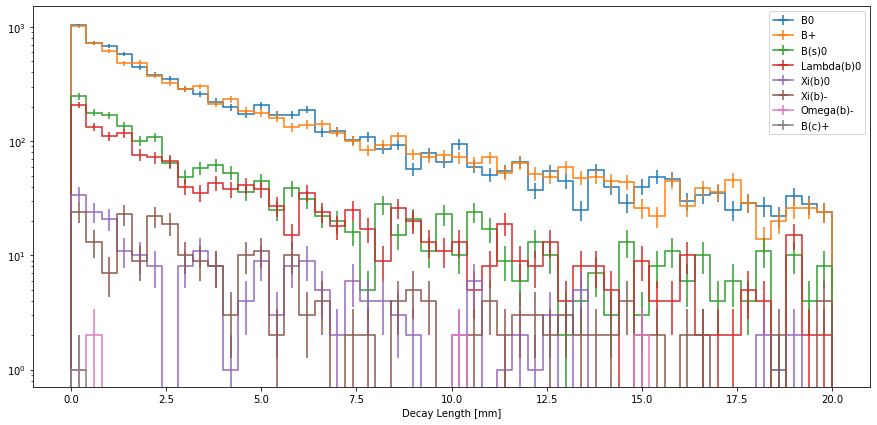

In [11]:
plt.figure(figsize=(15, 7))
h.plot()
plt.yscale('log')
_ = plt.legend()

I love this plot because it shows the different decay probabilities. THere are differences in lifetime, but they are harder to see because we aren't showing $c\tau$ here (and correcting for boost, mass, etc.).

## The Datamodel

The data model when this documentation was last built was:

In [12]:
from func_adl_servicex_xaodr21.xAOD.truthevent_v1 import TruthEvent_v1
help(TruthEvent_v1)

Help on class TruthEvent_v1 in module func_adl_servicex_xaodr21.xAOD.truthevent_v1:

class TruthEvent_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  beamParticle1Link(self) -> 'func_adl_servicex_xaodr21.elementlink_datavector_xaod_truthparticle_v1__.ElementLink_DataVector_xAOD_TruthParticle_v1__'
 |      A method
 |  
 |  beamParticle2Link(self) -> 'func_adl_servicex_xaodr21.elementlink_datavector_xaod_truthparticle_v1__.ElementLink_DataVector_xAOD_TruthParticle_v1__'
 |      A method
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  crossSection(self) -> 'float'
 |      A method
 |  
 |  crossSectionError(self) -> 'float'
 |      A method
 |  
 |  hasNonConstStore(self) -> 'bool'
 |      A method
 |  
 |  hasStore(self) -> 'bool'
 |      A method
 |  
 |  index(self) -> 'int'
 |      A method
 |  
 |  nTruthParticles(self) -> 'int'
 |      A method
 |  
 |  nTruthVertices(self) -> 'int'
 |      A method
 |  
 |  pdfInfo(self) -> 'func_adl_ser

In [13]:
from func_adl_servicex_xaodr21.xAOD.truthparticle_v1 import TruthParticle_v1
help(TruthParticle_v1)

Help on class TruthParticle_v1 in module func_adl_servicex_xaodr21.xAOD.truthparticle_v1:

class TruthParticle_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  TruthParticle_v1(self) -> 'func_adl_servicex_xaodr21.xAOD.truthparticle_v1.TruthParticle_v1'
 |      A method
 |  
 |  absPdgId(self) -> 'int'
 |      A method
 |  
 |  abseta(self) -> 'float'
 |      A method
 |  
 |  absrapidity(self) -> 'float'
 |      A method
 |  
 |  barcode(self) -> 'int'
 |      A method
 |  
 |  charge(self) -> 'float'
 |      A method
 |  
 |  child(self, i: 'int') -> 'func_adl_servicex_xaodr21.xAOD.truthparticle_v1.TruthParticle_v1'
 |      A method
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  decayVtx(self) -> 'func_adl_servicex_xaodr21.xAOD.truthvertex_v1.TruthVertex_v1'
 |      A method
 |  
 |  decayVtxLink(self) -> 'func_adl_servicex_xaodr21.elementlink_datavector_xaod_truthvertex_v1__.ElementLink_DataVector_xAOD_TruthVertex_v1__'
 |      A method
 | 

In [14]:
from func_adl_servicex_xaodr21.xAOD.truthvertex_v1 import TruthVertex_v1
help(TruthVertex_v1)

Help on class TruthVertex_v1 in module func_adl_servicex_xaodr21.xAOD.truthvertex_v1:

class TruthVertex_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  TruthVertex_v1(self) -> 'func_adl_servicex_xaodr21.xAOD.truthvertex_v1.TruthVertex_v1'
 |      A method
 |  
 |  barcode(self) -> 'int'
 |      A method
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  eta(self) -> 'float'
 |      A method
 |  
 |  hasNonConstStore(self) -> 'bool'
 |      A method
 |  
 |  hasStore(self) -> 'bool'
 |      A method
 |  
 |  id(self) -> 'int'
 |      A method
 |  
 |  incomingParticle(self, index: 'int') -> 'func_adl_servicex_xaodr21.xAOD.truthparticle_v1.TruthParticle_v1'
 |      A method
 |  
 |  incomingParticleLinks(self) -> 'func_adl_servicex_xaodr21.vector_elementlink_datavector_xaod_truthparticle_v1___.vector_ElementLink_DataVector_xAOD_TruthParticle_v1___'
 |      A method
 |  
 |  index(self) -> 'int'
 |      A method
 |  
 |  nIncomingParticles(self) -

## Further Information

* The [`xAOD::TruthEvent_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODTruth/xAODTruth/versions/TruthEvent_v1.h) with all the inline documentation.
* The [`xAOD::TruthParticle_v1` C++ header File](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODTruth/xAODTruth/versions/TruthParticle_v1.h) with all the inline documentation.
* The [`xAOD::TruthVertex_v1` C++ header File](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODTruth/xAODTruth/versions/TruthVertex_v1.h) with all the inline documentation.
* The [`xAOD::TruthPileupEvent_v1` C++ header File](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODTruth/xAODTruth/versions/TruthPileupEvent_v1.h) with all the inline documentation.